#### Libraries

In [1]:

#%% Importing Libraries
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import datetime
import math
import glob
from datetime import datetime
from decimal import Decimal
from operator import attrgetter
from scipy.stats import chi2_contingency


#library(dummies)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

#from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullAFTFitter

# Import sklearn functions
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns',200)
pd.set_option('display.width', 200)

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.externals import joblib


import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from pprint import pprint


#from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.model_selection as model_selection

from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
#import pydot 

#import mca

from random import sample

from sklearn import preprocessing

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from collections import Counter


from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
 
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import pydotplus
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where



In [8]:
#pip install pydotplus

#### Dataset Creation

In [4]:
directory = 'C:/Users/tleer/Python Projects/Dan Copenhaven Project/Framingham Heart Study/'

## Brought from Deficiencies Detail report instead
data = pd.read_csv(f'{directory}Data/framingham.csv')

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [86]:
#Removing roughly 14% of the data by doing this
data2 = data[~(data['glucose'].isna())]
data2 = data2[~(data2['education'].isna())]
data2 = data2[~(data2['BPMeds'].isna())]
data2 = data2[~(data2['cigsPerDay'].isna())]
data2 = data2[~(data2['BMI'].isna())]
data2 = data2[~(data2['totChol'].isna())]
data2 = data2[~(data2['heartRate'].isna())]

#data2['male'] = data2['male'].astype('str')
#data2['male'] = np.where(data2['male']=='1','male','female')



#data2['education'] = data2['male'].astype('str')


data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [33]:
# https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/#:~:text=Imbalanced%20data%20affects%20the%20performance,class%20to%20keep%20and%20delete.

#### EDA Visuals

In [87]:
data3 = data2
data3 = data3.drop(['prevalentStroke','diabetes','BPMeds'], axis=1)

In [88]:
#cat_list = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
#cat_list = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
cat_list = ['education']

for i in cat_list:
    data3[i] = data3[i].astype('str')
num_list = data3.select_dtypes(include=np.number).columns.tolist()

In [49]:
#cat_list = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
cat_list2 = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
#cat_list2 = ['male','education','currentSmoker','prevalentHyp']

for i in cat_list:
    data2[i] = data2[i].astype('str')
num_list2 = data2.select_dtypes(include=np.number).columns.tolist()

In [66]:
#https://towardsdatascience.com/an-overview-of-visual-techniques-for-exploratory-data-analysis-in-python-d35703d43faf

In [50]:
data2.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               231
diaBP               142
BMI                1298
heartRate            72
glucose             138
TenYearCHD            2
dtype: int64

In [89]:
data3.nunique()

male                2
age                39
education           4
currentSmoker       2
cigsPerDay         33
prevalentHyp        2
totChol           241
sysBP             231
diaBP             142
BMI              1298
heartRate          72
glucose           138
TenYearCHD          2
dtype: int64

#### Categorical Variables

In [90]:
#data2.male.value_counts()
data3.education.value_counts()


1.0    1526
2.0    1101
3.0     608
4.0     423
Name: education, dtype: int64

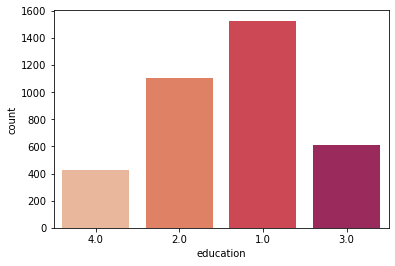

In [91]:
colors = sns.color_palette('rocket_r')
#plt.figure(figsize=(8,8))
#sns.set(font_scale=1.2)
#plt.xticks(rotation=45)

for i in cat_list:
    sns.countplot(x=i, data=data3, palette=colors)
    plt.show()

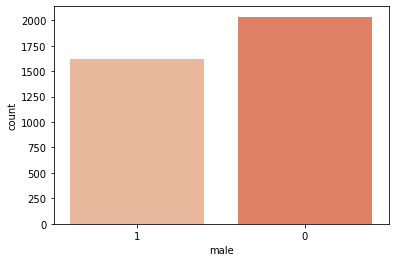

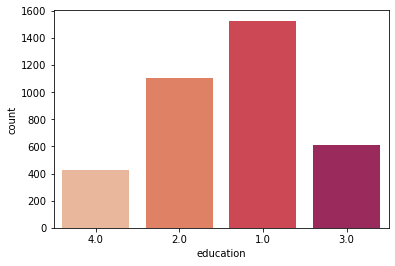

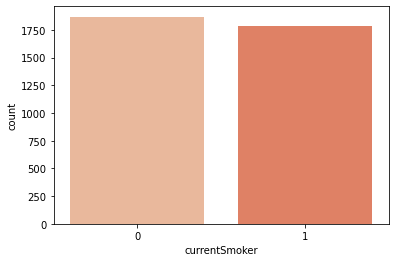

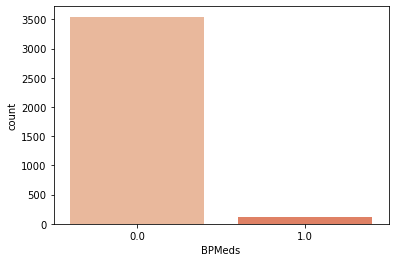

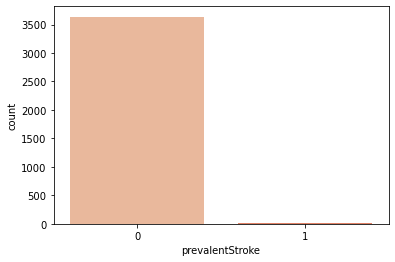

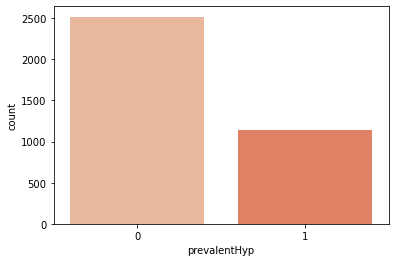

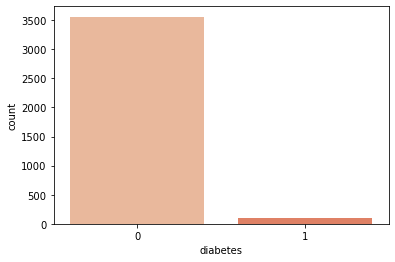

In [52]:
colors = sns.color_palette('rocket_r')
#plt.figure(figsize=(8,8))
#sns.set(font_scale=1.2)
#plt.xticks(rotation=45)

for i in cat_list2:
    sns.countplot(x=i, data=data2, palette=colors)
    plt.show()

#### Numerical Variables

In [92]:
num_list

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

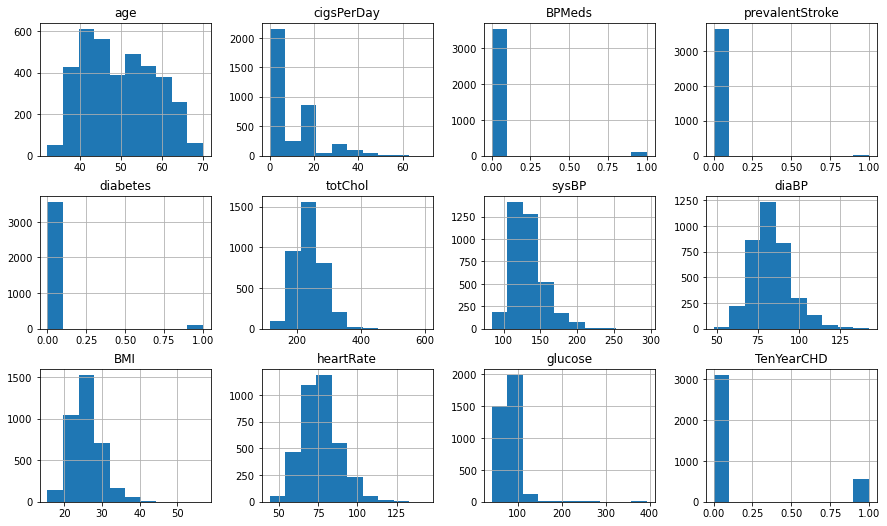

In [53]:
data2[num_list2].hist(bins=10,figsize=(15,12), layout=(4,4))

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

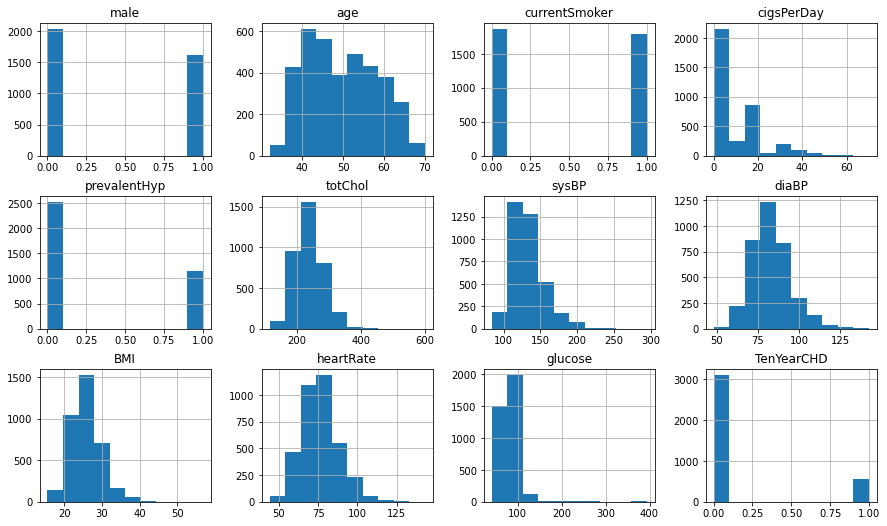

In [93]:
data3[num_list].hist(bins=10,figsize=(15,12), layout=(4,4))

#### Frequency for Each Categorical Variable

In [95]:
col_list = list(data3.columns)


In [96]:
cat_list

['education']

<AxesSubplot:xlabel='diabetes'>

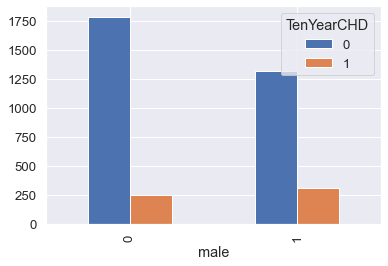

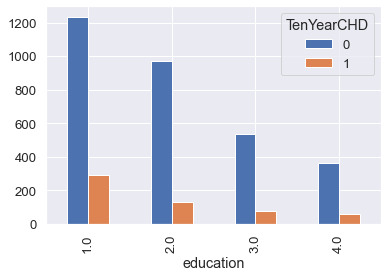

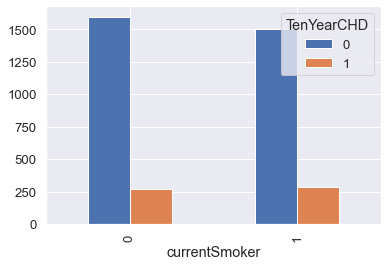

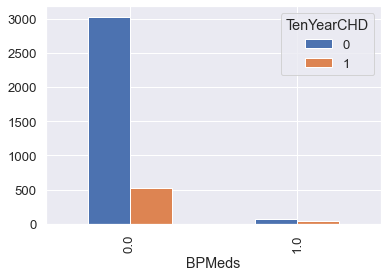

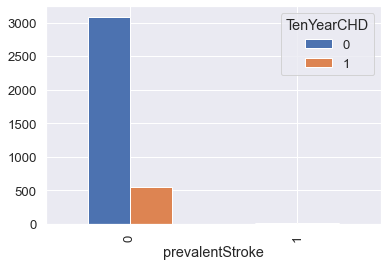

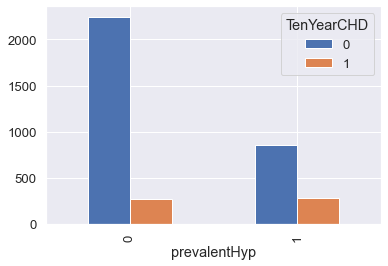

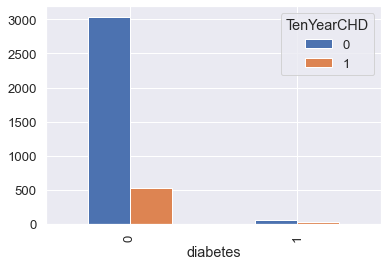

In [99]:
pd.crosstab(data2.male, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data2.education, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data2.currentSmoker, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data2.BPMeds, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data2.prevalentStroke, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data2.prevalentHyp, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data2.diabetes, data.TenYearCHD).plot(kind='bar')


<AxesSubplot:xlabel='prevalentHyp'>

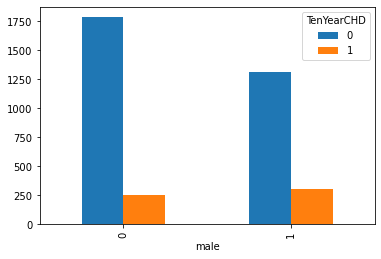

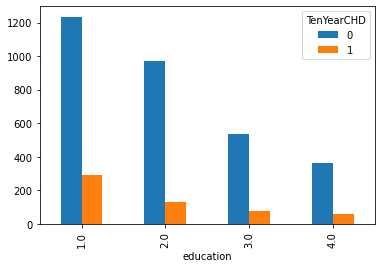

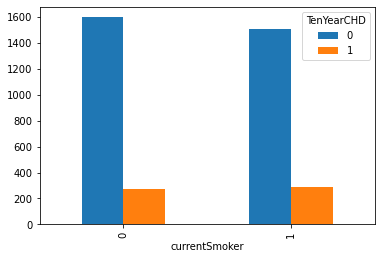

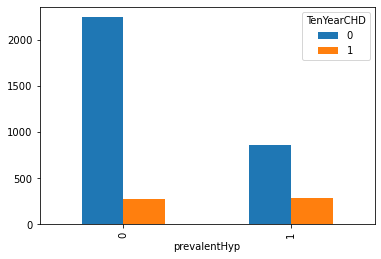

In [97]:
pd.crosstab(data3.male, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data3.education, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data3.currentSmoker, data.TenYearCHD).plot(kind='bar')
pd.crosstab(data3.prevalentHyp, data.TenYearCHD).plot(kind='bar')


In [89]:
#data2.diabetes.value_counts()


#### Create Dummy Variables

In [ ]:
# https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/#:~:text=Imbalanced%20data%20affects%20the%20performance,class%20to%20keep%20and%20delete.

# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [98]:
cat_list

['education']

In [99]:
#data2.TenYearCHD.value_counts()
#risk = len(data2[data2['TenYearCHD'] == 1])
#no_risk = len(data2[data2['TenYearCHD'] == 0])
#class_distribution_ratio = no_risk/risk
#ratio_risk_no_risk = risk/no_risk

data3.TenYearCHD.value_counts()
risk = len(data3[data3['TenYearCHD'] == 1])
no_risk = len(data3[data3['TenYearCHD'] == 0])
class_distribution_ratio = no_risk/risk
ratio_risk_no_risk = risk/no_risk

print(risk)
print(no_risk)
print(class_distribution_ratio)
print(ratio_risk_no_risk)

557
3101
5.567324955116697
0.1796194775878749


In [100]:
#cat_list.remove('TenYearCHD') 

dummy_list = ['education']

data4 = pd.get_dummies(data=data3, columns=[col for col in data3.columns if col in dummy_list], drop_first=True)
#data3 = pd.get_dummies(data=data2, columns=[col for col in data2.columns if col in cat_list], drop_first=True)


In [101]:
data4.head()

,male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,1
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,0


In [102]:
data4.columns.values
#data3.columns.values

array(['male', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'education_2.0', 'education_3.0', 'education_4.0'],
      dtype=object)

#### Train Test Split and Over-sampling using SMOTE

In [91]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## At a high level, SMOTE:
#### 1. Works by creating synthetic samples from the minor class (no-TenYearCHD) instead of creating copies.
#### 2. Randomly choosing one of the k-nearest neighbors and using it to create a similar, but randomly tweaked, new observations

In [103]:
X = data4.loc[:, data4.columns != 'TenYearCHD']
y = data4.loc[:, data4.columns == 'TenYearCHD']

#X = data3.loc[:, data3.columns != 'TenYearCHD']
#y = data3.loc[:, data3.columns == 'TenYearCHD']

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [106]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)


In [107]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TenYearCHD'])

In [108]:
# we can Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of no TenYearCHD in oversampled data",len(os_data_y[os_data_y['TenYearCHD']==0]))
print("Number of TenYearCHD",len(os_data_y[os_data_y['TenYearCHD']==1]))
print("Proportion of no TenYearCHD data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==0])/len(os_data_X))
print("Proportion of TenYearCHD data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==1])/len(os_data_X))

Length of oversampled data is  4370
Number of no TenYearCHD in oversampled data 2185
Number of TenYearCHD 2185
Proportion of no TenYearCHD data in oversampled data is  0.5
Proportion of TenYearCHD data in oversampled data is  0.5


In [118]:
#You may have noticed that I over-sampled only on the training data, 
#because by oversampling only on the training data, none of the information 
#in the test data is being used to create synthetic observations, therefore, 
#no information will bleed from test data into the model training.

#### Recursive Feature Elimination

In [114]:
data_final_vars = data4.columns.values.tolist()
y = ['TenYearCHD']
X = [i for i in data_final_vars if i not in y]

In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [111]:
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [112]:
X

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'education_2.0',
 'education_3.0',
 'education_4.0']

AttributeError: 'list' object has no attribute 'dtypes'

In [116]:

cols = ['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'education_2.0',
 'education_3.0',
 'education_4.0']


In [117]:
X=os_data_X[cols]
y=os_data_y['TenYearCHD']


In [118]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.537983
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.224      
Dependent Variable: TenYearCHD       AIC:              4729.9708  
Date:               2023-01-29 17:10 BIC:              4819.3261  
No. Observations:   4370             Log-Likelihood:   -2351.0    
Df Model:           13               LL-Null:          -3029.1    
Df Residuals:       4356             LLR p-value:      4.3174e-282
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
male              -0.4255   0.0805  -5.2895 0.0000 -0.5832 -0.2679
age                0.0143   0.0047   3.0176 0.0025  0